# Practical 2: Optical Remote Sensing

In this practical, we'll visualize and analyze Landsat 8 imagery data from difference places. This includes creating composites and calculating indices to highlight different features in the data.

---

## Cheatsheet

As a useful reference, here are the Landsat 8 bands:

| Band | Wavelength (µm) | Resolution (m) |
|------|:---------------:|:--------------:|
| 1-Ultra Blue  | 0.435-0.451  | 30 |
| 2-Blue  | 0.452-0.512  | 30 |
| 3-Green  | 0.533-0.590  | 30 |
| 4-Red  | 0.636-0.673  | 30 |
| 5-NIR  | 0.851-0.879  | 30 |
| 6-SWIR 1  | 1.566-1.651  | 30 |
| 7-SWIR 2  | 2.107-2.294  | 30 |
| 8-Panchromatic  | 0.503-0.676  | 15 |
| 9-Cirrus  | 1.363-1.384  | 30 |
| 10-Thermal 1  | 10.60-11.19  | 100 |
| 11-Thermal 2  | 11.50-12.51  | 100 |

---

## Import the required libraries

We'll start by importing the things we'll need to load the images, do some calculations, and plot them. 

> 💡 **Tip:** It's a good idea to put all your imports at the very first code cell of your notebook. This way you can easily check what needs to be installed for your notebook to work.

In [13]:
import skimage.io
import skimage.exposure
import numpy as np
import matplotlib.pyplot as plt
# This is new. We'll use it do insert a Google Maps into the notebook.
import IPython.display

---

## Data files

Throughout this notebook, we'll use two Landsat 8 scenes (cropped to make the files smaller):

* [mato_gross.zip](https://github.com/leouieda/remote-sensing/releases/download/2020%2F21/mato_grosso.zip)
* [thomas_fire.zip](https://github.com/leouieda/remote-sensing/releases/download/2020%2F21/thomas_fire.zip)

Download both zip archives and unzip them in **the same folder as this notebooks**.

---

## Creating composites

We'll start by learning how to create **composites** from the different bands provided by the Landsat 8 satellite. Other satellites use different band combinations but the underlying principles are the same. For this example, we'll use two scenes from the city of [Cláudia in Mato Grosso, Brazil](), from 2014 and 2020.

> 💡 **Tip:** Use the `IPython.display` module to insert things into your notebook. Basically anything that can be put on a web page is fair game. Here, I copied the `<iframe>` code that Google Maps provides when you go to "Share > Embed a map".

In [12]:
IPython.display.IFrame(width="100%", height=600, src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d525892.5387584838!2d-54.96848048271206!3d-11.571918929162646!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x93085c24b5761be7%3A0x84aeab22a06ee74b!2sCl%C3%A1udia%2C%20State%20of%20Mato%20Grosso%2C%2078540-000%2C%20Brazil!5e1!3m2!1sen!2suk!4v1643801073321!5m2!1sen!2suk")

Let's start with the 2014 scene. First thing to do is load the bands we'd need to make a true color (RGB) composite. Which bands do we need?

We'll once again use scikit-image to load the bands from the `.tif` files.

In [5]:
brazil_2014_blue = skimage.io.imread("mato_grosso/LC08_L2SP_226068_20140804_20200911_02_T1_cropped/LC08_L2SP_226068_20140804_20200911_02_T1_B2.TIF")
brazil_2014_green = skimage.io.imread("mato_grosso/LC08_L2SP_226068_20140804_20200911_02_T1_cropped/LC08_L2SP_226068_20140804_20200911_02_T1_B3.TIF")
brazil_2014_red = skimage.io.imread("mato_grosso/LC08_L2SP_226068_20140804_20200911_02_T1_cropped/LC08_L2SP_226068_20140804_20200911_02_T1_B4.TIF")

In [14]:
brazil_2014_blue

array([[7845, 7829, 7780, ..., 7868, 7729, 7752],
       [7811, 7771, 7781, ..., 7830, 7685, 7708],
       [7811, 7781, 7794, ..., 7719, 7705, 7728],
       ...,
       [7798, 7820, 7846, ..., 7718, 7743, 7740],
       [7815, 7814, 7890, ..., 7737, 7719, 7725],
       [7841, 7806, 7850, ..., 7710, 7767, 7731]], dtype=uint16)

Remember that what we load is a **digitized** version of the reflectance of light on each particular frequency band. For doing any **quantitative analysis**, we would need to first **convert this digitized data into reflectance**. We've done this before and it's a matter of finding out the **multiplicative and additive** constants for the particular bands that we're using. 

> 💡 **Tip:** To find those, open the `*_MTL.txt` files that come with each scene. They contain information about these parameters as well as the geographic coordinates, projection, date, processing level, citations, etc. Look for `GROUP = LEVEL2_SURFACE_REFLECTANCE_PARAMETERS` to find `REFLECTANCE_MULT_BAND_X` and `REFLECTANCE_ADD_BAND_X` to find the parameters that we need.

Since this is an operation that we have to do for each band, and the parameters values are the same for the bands we're using, let's make a **function** that does this so we don't repeat ourselves.

In [15]:
def convert_to_reflectance(band):
    """
    Convert a band from digitized to reflectance. 
    Works for bands 1-7 only.
    """
    mult_parameter = 2.75e-05
    add_parameter = -0.2
    return band * mult_parameter + add_parameter

Now apply it to our bands:

In [16]:
brazil_2014_blue_reflect = convert_to_reflectance(brazil_2014_blue)
brazil_2014_green_reflect = convert_to_reflectance(brazil_2014_green)
brazil_2014_red_reflect = convert_to_reflectance(brazil_2014_red)

> 💡 **Tip:** This would be even better using a *dictionary* to store the bands (instead of individual variables) paired with a `for` loop.

Let's plot only the green band first to quickly inspect the data:

Text(0, 0.5, 'northing (pixels)')

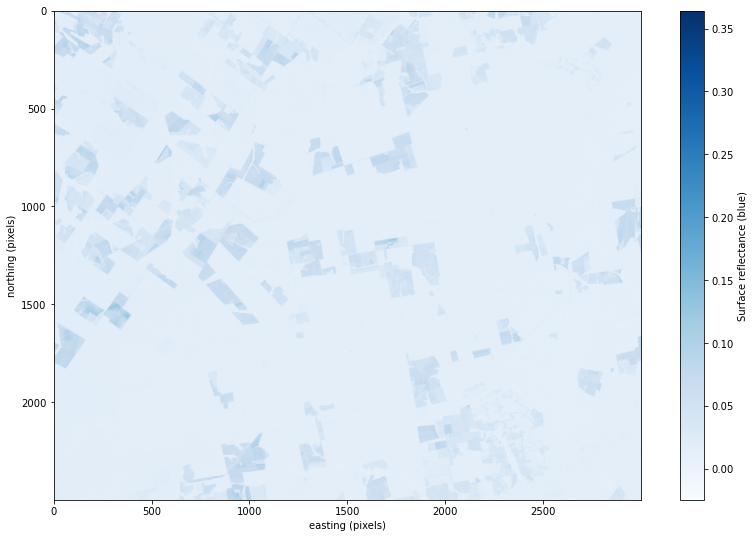

In [19]:
plt.figure(figsize=(14, 9))
plt.imshow(brazil_2014_blue_reflect, cmap="Blues")
plt.colorbar(label="Surface reflectance (blue)")
plt.xlabel("easting (pixels)")
plt.ylabel("northing (pixels)")

Looks OK and not obviously bad data.

Now we can make our RBG composite. Since we're going to plot this with matplotlib, we need to make it in a format that matplotlib accepts:

1. A 3D numpy array 
1. First 2 dimensions are the northing and easting (same as the individual bands)
1. Third dimension should have 3 elements: red, green, and blue intensity.
1. Data has to be 8-bit unsigned integers (`uint8`)

To make something like that, we'll start with an empty numpy array of the right **shape**. Then we can add each band to the respective element of the third dimension of the composite. Finally, we can rescale the composite to the range 0-255 (8-bit integer) using `skimage.exposure.rescale_intensity`.

### Your turn

Make a color-infrared composite of the same scene. What does it highlight and why?

---

## NDVI

Calculate the NDVI for the 2014 image.

---

## Tracking changes with time

Load the images from 2020 so we can visualize the changes.

### Your turn

Calculate the NDVI for 2020 and plot it along side the 2014 NDVI. Can you spot the differences?

---

## Caveats for tracking changes

There are some things to keep in mind for tracking changes with time. To exemplify, let's calculate the difference in NDVI between 2014 and 2020.

---

## Normalized Burn Ratio

Load the images and calculate the NBR for the 2017 Thomas fire in the city of Ventura, USA. We have images from before and after the fire.

### Your turn

Calculate and plot the difference in NBR: dNBR = NBR_before - NBR_after. 

Estimate the area that was severely burned (large dNBR values).

**What are the sources of uncertainty in this calculation?**